<a href="https://colab.research.google.com/github/conpop9/Stonks-v2/blob/main/Doge_Predict_DQN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dependencies

In [ ]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

In [32]:

import gym
import gym_anytrading
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.deepq.policies import MlpPolicy
from stable_baselines import DQN
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#Importing Doge Coin Data

In [33]:
df = pd.read_csv('doge.csv')

In [34]:
df.head()

,Date,Open,High,Low,Close,Volume
0,03/12/21,0.330407,0.432618,0.297074,0.397741,13850000000
1,03/11/21,0.474719,0.477866,0.217528,0.330353,19280000000
2,03/10/21,0.486444,0.512529,0.468941,0.474714,4750000000
3,03/09/21,0.513062,0.514821,0.457331,0.486366,6840000000
4,03/08/21,0.507796,0.547205,0.449635,0.513023,8260000000


In [35]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [36]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-03-12,0.330407,0.432618,0.297074,0.397741,13850000000
2021-03-11,0.474719,0.477866,0.217528,0.330353,19280000000
2021-03-10,0.486444,0.512529,0.468941,0.474714,4750000000
2021-03-09,0.513062,0.514821,0.457331,0.486366,6840000000
2021-03-08,0.507796,0.547205,0.449635,0.513023,8260000000


In [37]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,200), window_size=5)

In [38]:
env.signal_features

array([[ 3.97741e-01,  0.00000e+00],
       [ 3.30353e-01, -6.73880e-02],
       [ 4.74714e-01,  1.44361e-01],
       [ 4.86366e-01,  1.16520e-02],
       [ 5.13023e-01,  2.66570e-02],
       [ 5.07448e-01, -5.57500e-03],
       [ 5.59581e-01,  5.21330e-02],
       [ 4.86910e-01, -7.26710e-02],
       [ 3.89159e-01, -9.77510e-02],
       [ 4.93231e-01,  1.04072e-01],
       [ 4.49977e-01, -4.32540e-02],
       [ 5.68682e-01,  1.18705e-01],
       [ 6.34394e-01,  6.57120e-02],
       [ 6.86880e-01,  5.24860e-02],
       [ 5.79839e-01, -1.07041e-01],
       [ 6.55355e-01,  7.55160e-02],
       [ 5.59005e-01, -9.63500e-02],
       [ 4.38244e-01, -1.20761e-01],
       [ 3.72404e-01, -6.58400e-02],
       [ 3.90642e-01,  1.82380e-02],
       [ 3.36635e-01, -5.40070e-02],
       [ 3.03240e-01, -3.33950e-02],
       [ 3.23582e-01,  2.03420e-02],
       [ 2.70668e-01, -5.29140e-02],
       [ 2.69805e-01, -8.63000e-04],
       [ 2.51103e-01, -1.87020e-02],
       [ 2.70017e-01,  1.89140e-02],
 

# Environment

In [39]:
env.action_space

Discrete(2)

info {'total_reward': -0.18878700000000004, 'total_profit': 0.1793286543548696, 'position': 0}


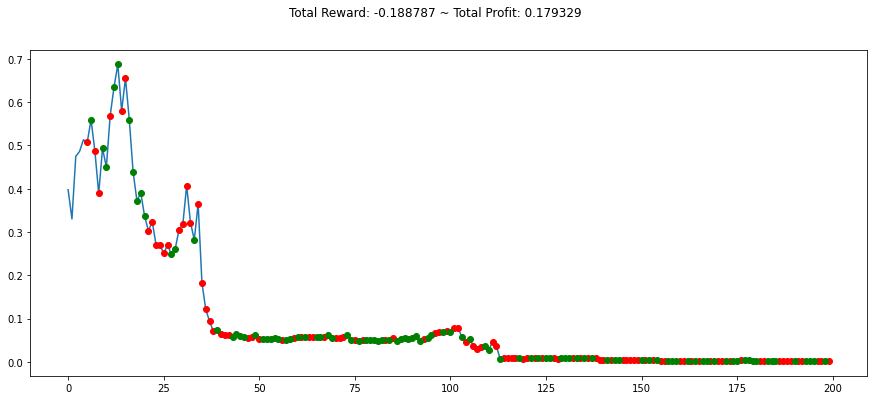

In [40]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

# Training Model

In [41]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(200,250), window_size=5)
env = DummyVecEnv([env_maker])

In [ ]:
model = DQN('MlpPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)

# Evaluation

In [45]:
env = gym.make('stocks-v0', df=df, frame_bound=(200,250), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 0.0, 'total_profit': 1.0675210864485982, 'position': 1}


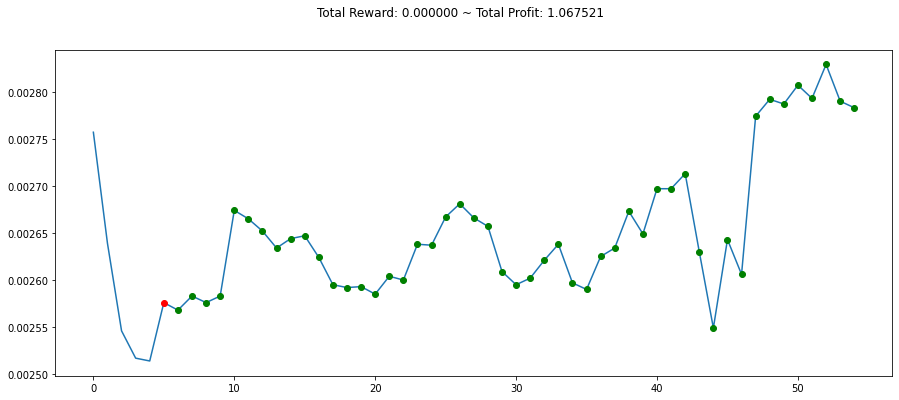

In [46]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()